In [1]:
# ‡∏ô‡∏≥‡πÄ‡∏Ç‡πâ‡∏≤‡πÑ‡∏•‡∏ö‡∏£‡∏≤‡∏£‡∏µ‡∏ó‡∏µ‡πà‡∏à‡∏≥‡πÄ‡∏õ‡πá‡∏ô
import yfinance as yf  # ‡∏î‡∏∂‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏´‡∏∏‡πâ‡∏ô
import pandas as pd  # ‡∏à‡∏±‡∏î‡∏Å‡∏≤‡∏£‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ï‡∏≤‡∏£‡∏≤‡∏á
import numpy as np  # ‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì‡∏ï‡∏±‡∏ß‡πÄ‡∏•‡∏Ç
from sklearn.preprocessing import StandardScaler  # ‡∏õ‡∏£‡∏±‡∏ö‡∏™‡πÄ‡∏Å‡∏•‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•
from sklearn.svm import SVC  # ‡πÇ‡∏°‡πÄ‡∏î‡∏• Support Vector Machine
from sklearn.model_selection import train_test_split  # ‡πÅ‡∏ö‡πà‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÄ‡∏ó‡∏£‡∏ô‡∏Å‡∏±‡∏ö‡πÄ‡∏ó‡∏™‡∏ï‡πå
from sklearn.metrics import accuracy_score  # ‡∏õ‡∏£‡∏∞‡πÄ‡∏°‡∏¥‡∏ô‡∏Ñ‡∏ß‡∏≤‡∏°‡πÅ‡∏°‡πà‡∏ô‡∏¢‡∏≥‡πÇ‡∏°‡πÄ‡∏î‡∏•

import yfinance as yf
df = yf.download("advanc.bk", start="2020-01-01", end="2025-06-13")
df=df[['Open', 'High','Low','Close']]

# ‡∏ñ‡πâ‡∏≤ Date ‡πÄ‡∏õ‡πá‡∏ô index ‡πÄ‡∏î‡∏¥‡∏° ‡∏ï‡πâ‡∏≠‡∏á reset ‡∏≠‡∏≠‡∏Å‡∏°‡∏≤‡∏Å‡πà‡∏≠‡∏ô
if df.index.name == 'Date':
    df = df.reset_index()

# ‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡∏ä‡∏∑‡πà‡∏≠‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå‡πÉ‡∏´‡πâ‡∏ï‡∏£‡∏á‡∏ï‡∏≤‡∏°‡∏•‡∏≥‡∏î‡∏±‡∏ö
df.columns = ['Date', 'Open', 'High', 'Low', 'Close']

# 2. ‡∏™‡∏£‡πâ‡∏≤‡∏á Label ‡∏á‡πà‡∏≤‡∏¢ ‡πÜ ‡πÄ‡∏ä‡πà‡∏ô ‡∏ñ‡πâ‡∏≤‡∏õ‡∏¥‡∏î‡∏ß‡∏±‡∏ô‡∏ñ‡∏±‡∏î‡πÑ‡∏õ‡∏™‡∏π‡∏á‡∏Å‡∏ß‡πà‡∏≤‡∏õ‡∏¥‡∏î‡∏ß‡∏±‡∏ô‡∏ô‡∏µ‡πâ ‡πÉ‡∏´‡πâ‡πÄ‡∏õ‡πá‡∏ô 1 (‡∏£‡∏≤‡∏Ñ‡∏≤‡∏Ç‡∏∂‡πâ‡∏ô)
df['Target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

# ‡πÅ‡∏õ‡∏•‡∏á Date ‡πÄ‡∏õ‡πá‡∏ô datetime ‡πÅ‡∏•‡∏∞‡∏ï‡∏±‡πâ‡∏á‡πÄ‡∏õ‡πá‡∏ô index ‡πÉ‡∏´‡∏°‡πà
df['Date'] = pd.to_datetime(df['Date'])



YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [2]:
print(df)

           Date        Open        High         Low       Close  Target
0    2020-01-02  173.490075  177.543581  171.868672  176.732880       0
1    2020-01-03  175.111465  175.922167  174.300764  175.111465       1
2    2020-01-06  175.111464  178.354269  175.111464  175.922165       1
3    2020-01-07  176.732901  181.597109  175.922199  180.786407       0
4    2020-01-08  179.164965  180.786367  177.543562  178.354263       0
...         ...         ...         ...         ...         ...     ...
1313 2025-06-06  293.000000  295.000000  289.000000  290.000000       0
1314 2025-06-09  291.000000  292.000000  288.000000  289.000000       0
1315 2025-06-10  288.000000  291.000000  287.000000  288.000000       1
1316 2025-06-11  288.000000  293.000000  288.000000  292.000000       0
1317 2025-06-12  291.000000  291.000000  285.000000  286.000000       0

[1318 rows x 6 columns]


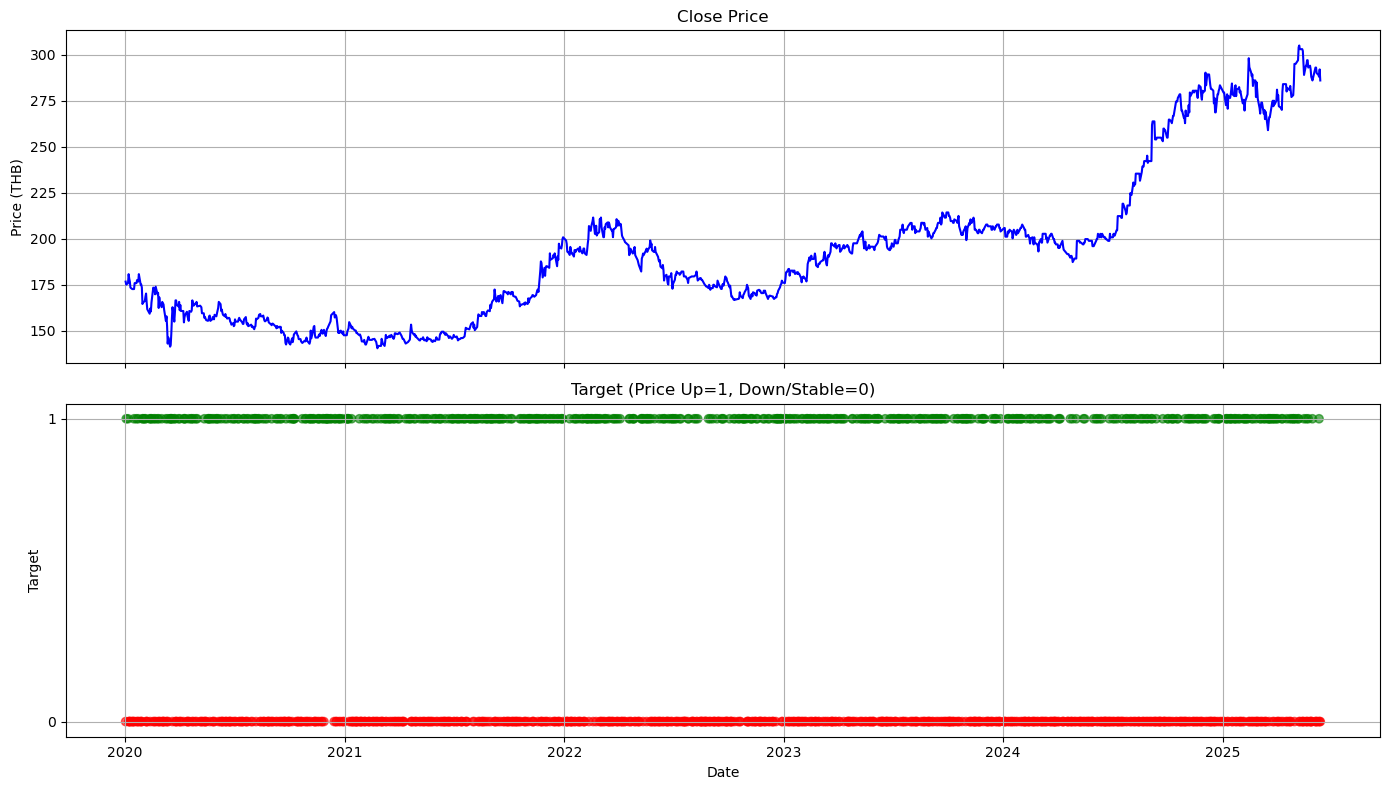

In [3]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14,8), sharex=True)

# ‡∏Å‡∏£‡∏≤‡∏ü‡∏£‡∏≤‡∏Ñ‡∏≤‡∏õ‡∏¥‡∏î
ax1.plot(df['Date'], df['Close'], color='blue')
ax1.set_title('Close Price')
ax1.set_ylabel('Price (THB)')
ax1.grid(True)

# ‡∏Å‡∏£‡∏≤‡∏ü Target
ax2.scatter(df['Date'], df['Target'], c=df['Target'].map({0:'red', 1:'green'}), marker='o', alpha=0.6)
ax2.set_title('Target (Price Up=1, Down/Stable=0)')
ax2.set_ylabel('Target')
ax2.set_yticks([0, 1])
ax2.grid(True)

plt.xlabel('Date')
plt.tight_layout()
plt.show()



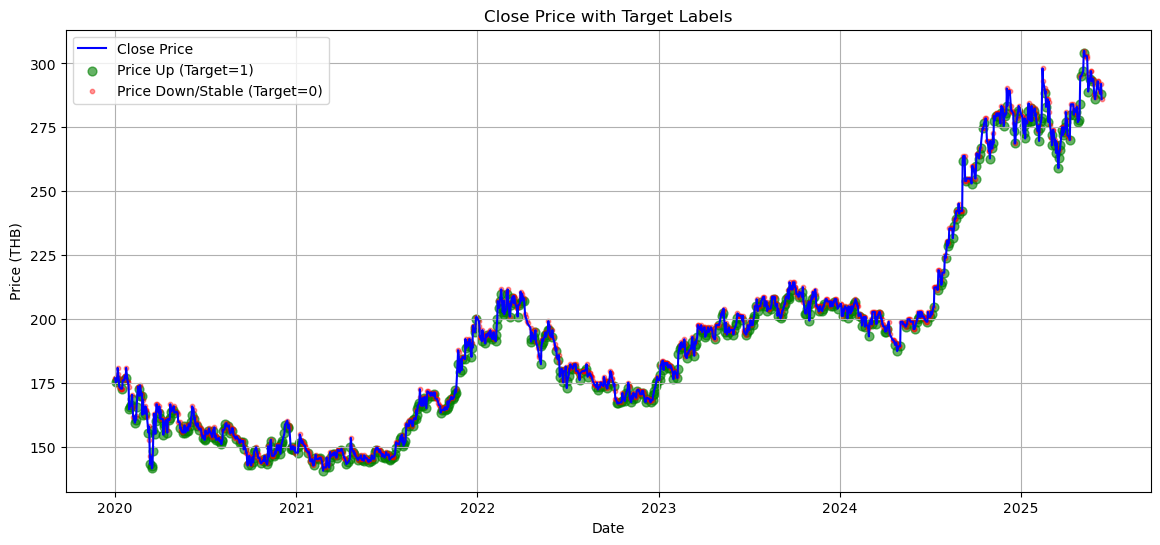

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))

# ‡∏ß‡∏≤‡∏î‡πÄ‡∏™‡πâ‡∏ô‡∏£‡∏≤‡∏Ñ‡∏≤‡∏õ‡∏¥‡∏î
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')

# ‡∏ß‡∏≤‡∏î‡∏à‡∏∏‡∏î Target ‡∏ó‡∏µ‡πà‡πÄ‡∏õ‡πá‡∏ô 1 (‡∏£‡∏≤‡∏Ñ‡∏≤‡∏Ç‡∏∂‡πâ‡∏ô) ‡∏î‡πâ‡∏ß‡∏¢‡∏™‡∏µ‡πÄ‡∏Ç‡∏µ‡∏¢‡∏ß ‡∏à‡∏∏‡∏î‡πÉ‡∏´‡∏ç‡πà
plt.scatter(df.loc[df['Target'] == 1, 'Date'], 
            df.loc[df['Target'] == 1, 'Close'], 
            color='green', label='Price Up (Target=1)', s=40, alpha=0.6)

# ‡∏ß‡∏≤‡∏î‡∏à‡∏∏‡∏î Target ‡∏ó‡∏µ‡πà‡πÄ‡∏õ‡πá‡∏ô 0 (‡∏£‡∏≤‡∏Ñ‡∏≤‡∏•‡∏á‡∏´‡∏£‡∏∑‡∏≠‡πÄ‡∏ó‡πà‡∏≤‡πÄ‡∏î‡∏¥‡∏°) ‡∏î‡πâ‡∏ß‡∏¢‡∏™‡∏µ‡πÅ‡∏î‡∏á ‡∏à‡∏∏‡∏î‡πÄ‡∏•‡πá‡∏Å
plt.scatter(df.loc[df['Target'] == 0, 'Date'], 
            df.loc[df['Target'] == 0, 'Close'], 
            color='red', label='Price Down/Stable (Target=0)', s=10, alpha=0.4)

plt.title('Close Price with Target Labels')
plt.xlabel('Date')
plt.ylabel('Price (THB)')
plt.legend()
plt.grid(True)
plt.show()


In [5]:
# ‡∏Å‡∏£‡∏≠‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÄ‡∏â‡∏û‡∏≤‡∏∞‡∏ß‡∏±‡∏ô‡∏ó‡∏µ‡πà Target=1
buy_signals = df[df['Target'] == 1][['Date', 'Close']]

# ‡πÅ‡∏™‡∏î‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•
print(buy_signals.reset_index(drop=True))


          Date       Close
0   2020-01-03  175.111465
1   2020-01-06  175.922165
2   2020-01-16  172.679382
3   2020-01-20  175.922165
4   2020-01-23  176.732880
..         ...         ...
530 2025-05-16  289.000000
531 2025-05-20  294.000000
532 2025-05-23  293.000000
533 2025-05-30  286.000000
534 2025-06-10  288.000000

[535 rows x 2 columns]


In [6]:
# 1. ‡∏´‡∏≤‡∏™‡∏±‡∏ç‡∏ç‡∏≤‡∏ì Target = 1 ‡πÅ‡∏£‡∏Å
first_buy_signal = df[df['Target'] == 1].iloc[0]
buy_date = first_buy_signal['Date']
buy_price = first_buy_signal['Close']

print(f"üîπ ‡∏™‡∏±‡∏ç‡∏ç‡∏≤‡∏ì‡∏ã‡∏∑‡πâ‡∏≠‡πÅ‡∏£‡∏Å‡πÄ‡∏Å‡∏¥‡∏î‡∏Ç‡∏∂‡πâ‡∏ô‡∏ß‡∏±‡∏ô‡∏ó‡∏µ‡πà: {buy_date.date()} ‡∏ó‡∏µ‡πà‡∏£‡∏≤‡∏Ñ‡∏≤‡∏õ‡∏¥‡∏î: {buy_price:.2f}")

# 2. ‡πÄ‡∏•‡∏∑‡∏≠‡∏Å‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏´‡∏•‡∏±‡∏á‡∏à‡∏≤‡∏Å‡∏ß‡∏±‡∏ô‡∏ã‡∏∑‡πâ‡∏≠ ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏î‡∏π‡∏ß‡πà‡∏≤‡∏£‡∏≤‡∏Ñ‡∏≤‡∏•‡∏á‡πÑ‡∏õ‡πÅ‡∏Ñ‡πà‡πÑ‡∏´‡∏ô ‡πÅ‡∏•‡πâ‡∏ß‡∏î‡∏µ‡∏î‡∏Å‡∏•‡∏±‡∏ö
after_buy = df[df['Date'] > buy_date].copy()
after_buy.reset_index(drop=True, inplace=True)

# ‡∏´‡∏≤‡∏à‡∏∏‡∏î‡∏ï‡πà‡∏≥‡∏™‡∏∏‡∏î‡∏´‡∏•‡∏±‡∏á‡∏à‡∏≤‡∏Å‡∏ã‡∏∑‡πâ‡∏≠
min_price_idx = after_buy['Close'].idxmin()
min_price_row = after_buy.loc[min_price_idx]
min_date = min_price_row['Date']
min_price = min_price_row['Close']

print(f"üîª ‡∏£‡∏≤‡∏Ñ‡∏≤‡∏ï‡πà‡∏≥‡∏™‡∏∏‡∏î‡∏´‡∏•‡∏±‡∏á‡∏™‡∏±‡∏ç‡∏ç‡∏≤‡∏ì‡∏ã‡∏∑‡πâ‡∏≠: {min_price:.2f} ‡∏ß‡∏±‡∏ô‡∏ó‡∏µ‡πà: {min_date.date()}")

# ‡∏´‡∏≤‡∏£‡∏≤‡∏Ñ‡∏≤‡∏™‡∏π‡∏á‡∏™‡∏∏‡∏î‡∏´‡∏•‡∏±‡∏á‡∏à‡∏∏‡∏î‡∏ï‡πà‡∏≥‡∏™‡∏∏‡∏î (‡∏ä‡πà‡∏ß‡∏á rebound ‡πÅ‡∏£‡∏Å)
rebound = after_buy[after_buy['Date'] > min_date]
max_price_row = rebound.loc[rebound['Close'].idxmax()]
rebound_date = max_price_row['Date']
rebound_price = max_price_row['Close']

print(f"üî∫ ‡∏£‡∏≤‡∏Ñ‡∏≤‡∏™‡∏π‡∏á‡∏™‡∏∏‡∏î‡∏ä‡πà‡∏ß‡∏á rebound: {rebound_price:.2f} ‡∏ß‡∏±‡∏ô‡∏ó‡∏µ‡πà: {rebound_date.date()}")



üîπ ‡∏™‡∏±‡∏ç‡∏ç‡∏≤‡∏ì‡∏ã‡∏∑‡πâ‡∏≠‡πÅ‡∏£‡∏Å‡πÄ‡∏Å‡∏¥‡∏î‡∏Ç‡∏∂‡πâ‡∏ô‡∏ß‡∏±‡∏ô‡∏ó‡∏µ‡πà: 2020-01-03 ‡∏ó‡∏µ‡πà‡∏£‡∏≤‡∏Ñ‡∏≤‡∏õ‡∏¥‡∏î: 175.11
üîª ‡∏£‡∏≤‡∏Ñ‡∏≤‡∏ï‡πà‡∏≥‡∏™‡∏∏‡∏î‡∏´‡∏•‡∏±‡∏á‡∏™‡∏±‡∏ç‡∏ç‡∏≤‡∏ì‡∏ã‡∏∑‡πâ‡∏≠: 140.52 ‡∏ß‡∏±‡∏ô‡∏ó‡∏µ‡πà: 2021-02-24
üî∫ ‡∏£‡∏≤‡∏Ñ‡∏≤‡∏™‡∏π‡∏á‡∏™‡∏∏‡∏î‡∏ä‡πà‡∏ß‡∏á rebound: 305.00 ‡∏ß‡∏±‡∏ô‡∏ó‡∏µ‡πà: 2025-05-08


C:\Users\User\AppData\Local\Temp\ipykernel_25912\1581551576.py:27: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_25912\1581551576.py:27: UserWarning: Glyph 128315 (\N{DOWN-POINTING RED TRIANGLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_25912\1581551576.py:27: UserWarning: Glyph 128314 (\N{UP-POINTING RED TRIANGLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128315 (\N{DOWN-POINTING RED TRIANGLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\py

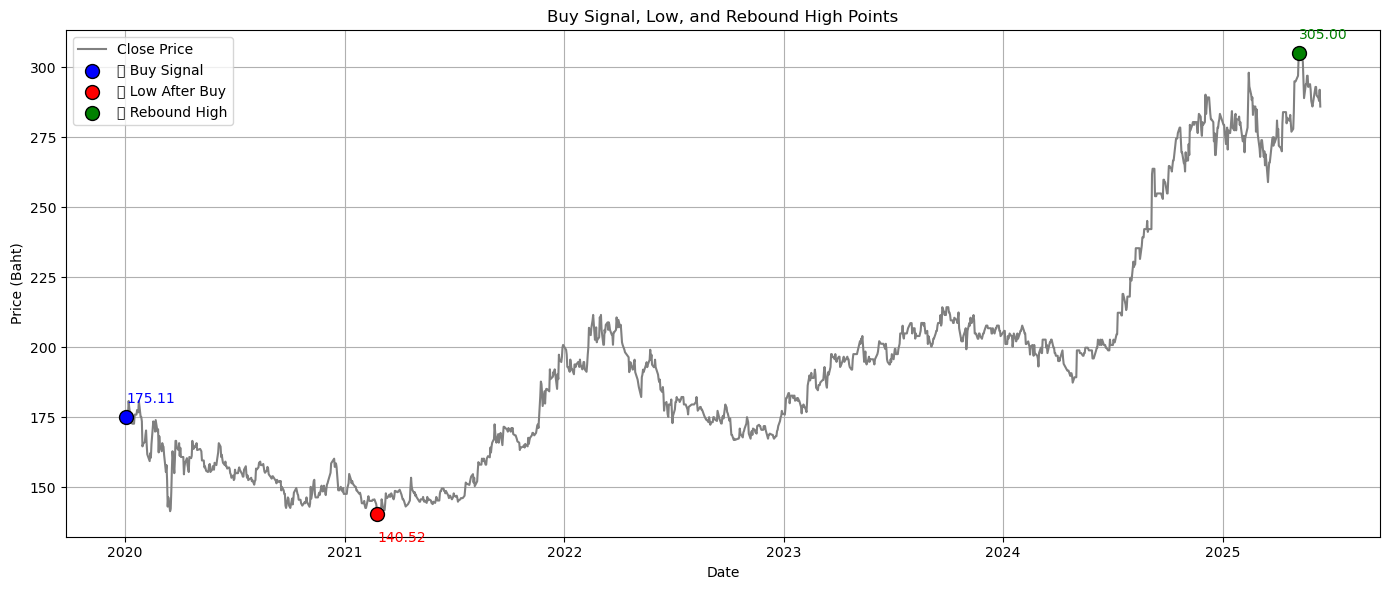

In [7]:
import matplotlib.pyplot as plt

# ‡∏ß‡∏≤‡∏î‡∏Å‡∏£‡∏≤‡∏ü‡∏£‡∏≤‡∏Ñ‡∏≤‡∏õ‡∏¥‡∏î
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='gray')

# ‡∏ß‡∏á‡∏Å‡∏•‡∏°‡∏à‡∏∏‡∏î‡∏™‡∏±‡∏ç‡∏ç‡∏≤‡∏ì‡∏ã‡∏∑‡πâ‡∏≠
plt.scatter(buy_date, buy_price, color='blue', label='üîπ Buy Signal', s=100, edgecolors='black', zorder=5)

# ‡∏ß‡∏á‡∏Å‡∏•‡∏°‡∏à‡∏∏‡∏î‡∏ï‡πà‡∏≥‡∏™‡∏∏‡∏î
plt.scatter(min_date, min_price, color='red', label='üîª Low After Buy', s=100, edgecolors='black', zorder=5)

# ‡∏ß‡∏á‡∏Å‡∏•‡∏°‡∏à‡∏∏‡∏î rebound
plt.scatter(rebound_date, rebound_price, color='green', label='üî∫ Rebound High', s=100, edgecolors='black', zorder=5)

# ‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏Ç‡πâ‡∏≠‡∏Ñ‡∏ß‡∏≤‡∏°‡∏õ‡∏£‡∏∞‡∏Å‡∏≠‡∏ö
plt.text(buy_date, buy_price + 5, f'{buy_price:.2f}', color='blue')
plt.text(min_date, min_price - 10, f'{min_price:.2f}', color='red')
plt.text(rebound_date, rebound_price + 5, f'{rebound_price:.2f}', color='green')

# ‡∏à‡∏±‡∏î‡∏£‡∏π‡∏õ‡πÅ‡∏ö‡∏ö‡∏Å‡∏£‡∏≤‡∏ü
plt.title("Buy Signal, Low, and Rebound High Points")
plt.xlabel("Date")
plt.ylabel("Price (Baht)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [8]:

# 3. ‡∏•‡∏ö‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÅ‡∏ñ‡∏ß‡∏™‡∏∏‡∏î‡∏ó‡πâ‡∏≤‡∏¢‡∏ó‡∏µ‡πà‡πÑ‡∏°‡πà‡∏°‡∏µ Target (‡πÄ‡∏ô‡∏∑‡πà‡∏≠‡∏á‡∏à‡∏≤‡∏Å shift(-1))
df = df[:-1]

# 4. ‡πÄ‡∏ï‡∏£‡∏µ‡∏¢‡∏°‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• X (features) ‡πÅ‡∏•‡∏∞ y (target)
X = df[['Open', 'High', 'Low', 'Close']].values
y = df['Target'].values

# 5. ‡πÅ‡∏ö‡πà‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÄ‡∏õ‡πá‡∏ô‡∏ä‡∏∏‡∏î‡πÄ‡∏ó‡∏£‡∏ô‡πÅ‡∏•‡∏∞‡∏ä‡∏∏‡∏î‡∏ó‡∏î‡∏™‡∏≠‡∏ö (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 6. ‡∏õ‡∏£‡∏±‡∏ö‡∏™‡πÄ‡∏Å‡∏•‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• (StandardScaler ‡∏ä‡πà‡∏ß‡∏¢‡πÉ‡∏´‡πâ‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏°‡∏µ mean=0 ‡πÅ‡∏•‡∏∞ std=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. ‡∏™‡∏£‡πâ‡∏≤‡∏á‡πÇ‡∏°‡πÄ‡∏î‡∏• SVM ‡πÅ‡∏•‡∏∞‡πÄ‡∏ó‡∏£‡∏ô
model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
model.fit(X_train_scaled, y_train)

# 8. ‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡∏ú‡∏•‡πÅ‡∏•‡∏∞‡∏õ‡∏£‡∏∞‡πÄ‡∏°‡∏¥‡∏ô‡∏Ñ‡∏ß‡∏≤‡∏°‡πÅ‡∏°‡πà‡∏ô‡∏¢‡∏≥
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of SVM model: {accuracy:.4f}")


Accuracy of SVM model: 0.5682


In [9]:
print(df.dtypes)

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Target             int32
dtype: object


In [10]:
if df.index.name == 'Date':
    df = df.reset_index()

In [11]:
print(df)

           Date        Open        High         Low       Close  Target
0    2020-01-02  173.490075  177.543581  171.868672  176.732880       0
1    2020-01-03  175.111465  175.922167  174.300764  175.111465       1
2    2020-01-06  175.111464  178.354269  175.111464  175.922165       1
3    2020-01-07  176.732901  181.597109  175.922199  180.786407       0
4    2020-01-08  179.164965  180.786367  177.543562  178.354263       0
...         ...         ...         ...         ...         ...     ...
1312 2025-06-05  295.000000  295.000000  291.000000  293.000000       0
1313 2025-06-06  293.000000  295.000000  289.000000  290.000000       0
1314 2025-06-09  291.000000  292.000000  288.000000  289.000000       0
1315 2025-06-10  288.000000  291.000000  287.000000  288.000000       1
1316 2025-06-11  288.000000  293.000000  288.000000  292.000000       0

[1317 rows x 6 columns]


In [12]:
print(X)

[[173.49007451 177.54358092 171.86867194 176.73287964]
 [175.11146545 175.92216668 174.30076423 175.11146545]
 [175.1114637  178.35426858 175.1114637  175.92216492]
 ...
 [291.         292.         288.         289.        ]
 [288.         291.         287.         288.        ]
 [288.         293.         288.         292.        ]]


In [13]:
print(y)

[0 1 1 ... 0 1 0]


In [14]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import talib as ta  # ‡∏ï‡πâ‡∏≠‡∏á‡∏ï‡∏¥‡∏î‡∏ï‡∏±‡πâ‡∏á TA-Lib ‡πÉ‡∏´‡πâ‡πÄ‡∏£‡∏µ‡∏¢‡∏ö‡∏£‡πâ‡∏≠‡∏¢‡∏Å‡πà‡∏≠‡∏ô


In [15]:

# 2. ‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì Indicator
df['EMA25'] = ta.EMA(df['Close'], timeperiod=25)
df['EMA75'] = ta.EMA(df['Close'], timeperiod=75)
df['EMA200'] = ta.EMA(df['Close'], timeperiod=200)
df['RSI'] = ta.RSI(df['Close'], timeperiod=14)

macd, macdsignal, macdhist = ta.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
df['MACD'] = macd
df['MACD_signal'] = macdsignal
df['MACD_hist'] = macdhist

# 3. ‡∏•‡∏ö‡πÅ‡∏ñ‡∏ß‡∏ó‡∏µ‡πà‡∏°‡∏µ‡∏Ñ‡πà‡∏≤ NaN (‡∏à‡∏≤‡∏Å‡∏Å‡∏≤‡∏£‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì indicator ‡∏ä‡πà‡∏ß‡∏á‡πÅ‡∏£‡∏Å)
df.dropna(inplace=True)

# 4. ‡∏™‡∏£‡πâ‡∏≤‡∏á Target Signal ‡∏ï‡∏±‡∏ß‡∏≠‡∏¢‡πà‡∏≤‡∏á
# ‡πÄ‡∏á‡∏∑‡πà‡∏≠‡∏ô‡πÑ‡∏Ç‡∏á‡πà‡∏≤‡∏¢: EMA25 > EMA75 > EMA200 ‡πÅ‡∏•‡∏∞ RSI < 70 => target = 1 (‡πÄ‡∏ó‡∏£‡∏ô‡∏î‡πå‡∏Ç‡∏≤‡∏Ç‡∏∂‡πâ‡∏ô)
# ‡πÑ‡∏°‡πà‡∏á‡∏±‡πâ‡∏ô target = 0
df['Target'] = np.where(
    (df['EMA25'] > df['EMA75']) &
    (df['EMA75'] > df['EMA200']) &
    (df['RSI'] < 70),
    1, 0
)

# 5. ‡πÄ‡∏ï‡∏£‡∏µ‡∏¢‡∏° Features ‡πÅ‡∏•‡∏∞ Target
features = ['Open', 'High', 'Low', 'Close', 'EMA25', 'EMA75', 'EMA200', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist']
X = df[features].values
y = df['Target'].values

# 6. ‡πÅ‡∏ö‡πà‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 7. ‡∏õ‡∏£‡∏±‡∏ö‡∏™‡πÄ‡∏Å‡∏•
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 8. ‡∏™‡∏£‡πâ‡∏≤‡∏á‡πÇ‡∏°‡πÄ‡∏î‡∏• SVM ‡πÅ‡∏•‡∏∞‡πÄ‡∏ó‡∏£‡∏ô
model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
model.fit(X_train_scaled, y_train)

# 9. ‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡πÅ‡∏•‡∏∞‡∏õ‡∏£‡∏∞‡πÄ‡∏°‡∏¥‡∏ô‡∏ú‡∏•
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with EMA, RSI, MACD indicators: {accuracy:.4f}")

Accuracy with EMA, RSI, MACD indicators: 0.8750


In [16]:
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Target', 'EMA25', 'EMA75',
       'EMA200', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist'],
      dtype='object')


In [17]:
# ‡∏Å‡∏≥‡∏´‡∏ô‡∏î‡∏ï‡∏±‡∏ß‡πÅ‡∏õ‡∏£‡πÄ‡∏õ‡πâ‡∏≤‡∏´‡∏°‡∏≤‡∏¢ (Target)
y = df['Target']

# ‡∏Å‡∏≥‡∏´‡∏ô‡∏î‡∏ï‡∏±‡∏ß‡πÅ‡∏õ‡∏£‡∏ï‡πâ‡∏ô (Predictors) ‡πÇ‡∏î‡∏¢‡πÑ‡∏°‡πà‡∏£‡∏ß‡∏° Date ‡πÅ‡∏•‡∏∞ Target
X = df[['Open', 'High', 'Low', 'Close', 
        'EMA25', 'EMA75', 'EMA200', 
        'RSI', 'MACD', 'MACD_signal', 'MACD_hist']]


In [18]:
from sklearn.model_selection import train_test_split

# ‡∏ï‡∏±‡∏ß‡πÅ‡∏õ‡∏£‡∏ï‡πâ‡∏ô (Features) ‡πÅ‡∏•‡∏∞ ‡∏ï‡∏±‡∏ß‡πÅ‡∏õ‡∏£‡πÄ‡∏õ‡πâ‡∏≤‡∏´‡∏°‡∏≤‡∏¢ (Target)
X = df[['Open', 'High', 'Low', 'Close', 
        'EMA25', 'EMA75', 'EMA200', 
        'RSI', 'MACD', 'MACD_signal', 'MACD_hist']]
y = df['Target']

# ‡πÅ‡∏ö‡πà‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÄ‡∏õ‡πá‡∏ô 80% train ‡πÅ‡∏•‡∏∞ 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [19]:
df

Date        Open        High         Low       Close  Target  \
199  2020-10-27  143.406301  144.664251  142.567667  144.244934       0   
200  2020-10-28  143.825592  145.083542  143.406275  145.083542       0   
201  2020-10-29  145.083557  146.341507  144.244924  146.341507       0   
202  2020-10-30  146.760829  146.760829  143.825612  144.664246       0   
203  2020-11-02  145.502895  145.502895  143.406311  143.406311       0   
...         ...         ...         ...         ...         ...     ...   
1312 2025-06-05  295.000000  295.000000  291.000000  293.000000       1   
1313 2025-06-06  293.000000  295.000000  289.000000  290.000000       1   
1314 2025-06-09  291.000000  292.000000  288.000000  289.000000       1   
1315 2025-06-10  288.000000  291.000000  287.000000  288.000000       1   
1316 2025-06-11  288.000000  293.000000  288.000000  292.000000       1   

           EMA25       EMA75      EMA200        RSI      MACD  MACD_signal  \
199   146.415929  150.715527  158.562357  42.095232 -1.349116    -1.390564   
200   146.313438  150.567317  158.428239  45.155685 -1.256022    -1.363656   
201   146.315597  150.456112  158.307973  49.470029 -1.068421    -1.304609   
202   146.188570  150.303694  158.172215  44.449319 -1.043064    -1.252300   
203   145.974550  150.122184  158.025290  41.081769 -1.111658    -1.224171   
...          ...         ...         ...        ...       ...          ...   
1312  290.896916  284.287442  268.712255  53.366154  1.110924     2.302123   
1313  290.827923  284.437773  268.924073  49.243306  0.880667     2.017832   
1314  290.687313  284.557831  269.123834  47.914500  0.610458     1.736357   
1315  290.480597  284.648415  269.311656  46.561414  0.312027     1.451491   
1316  290.597474  284.841878  269.537411  52.357058  0.393746     1.239942   

      MACD_hist  
199    0.041448  
200    0.107633  
201    0.236187  
202    0.209236  
203    0.112514  
...         ...  
1312  -1.191199  
1313  -1.137165  
1314  -1.125899  
1315  -1.139464  
1316  -0.846196  

[1118 rows x 13 columns]

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# ‡∏™‡∏£‡πâ‡∏≤‡∏á Decision Tree Model
clf = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

# ‡∏ù‡∏∂‡∏Å‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏î‡πâ‡∏ß‡∏¢ train set
clf.fit(X_train, y_train)

# ‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡∏ú‡∏•‡∏à‡∏≤‡∏Å test set
y_pred = clf.predict(X_test)

# ‡∏õ‡∏£‡∏∞‡πÄ‡∏°‡∏¥‡∏ô‡∏ú‡∏•‡πÇ‡∏°‡πÄ‡∏î‡∏•
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy on Test Set: 0.71875

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.10      0.18        70
           1       0.71      1.00      0.83       154

    accuracy                           0.72       224
   macro avg       0.85      0.55      0.51       224
weighted avg       0.80      0.72      0.63       224



In [21]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(
    criterion='gini',         # ‡πÉ‡∏ä‡πâ Gini impurity ‡πÄ‡∏õ‡πá‡∏ô‡πÄ‡∏Å‡∏ì‡∏ë‡πå‡πÉ‡∏ô‡∏Å‡∏≤‡∏£‡πÅ‡∏¢‡∏Å‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•
    max_depth=3,              # ‡∏à‡∏≥‡∏Å‡∏±‡∏î‡∏Ñ‡∏ß‡∏≤‡∏°‡∏•‡∏∂‡∏Å‡∏Ç‡∏≠‡∏á‡∏ï‡πâ‡∏ô‡πÑ‡∏°‡πâ‡∏ó‡∏µ‡πà‡∏£‡∏∞‡∏î‡∏±‡∏ö 3
    min_samples_leaf=5        # ‡πÉ‡∏ö‡∏™‡∏∏‡∏î‡∏ó‡πâ‡∏≤‡∏¢‡∏ï‡πâ‡∏≠‡∏á‡∏°‡∏µ‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏≠‡∏¢‡πà‡∏≤‡∏á‡∏ô‡πâ‡∏≠‡∏¢ 5 ‡∏ï‡∏±‡∏ß‡∏≠‡∏¢‡πà‡∏≤‡∏á
)


In [22]:
clf

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

In [23]:
clf = clf.fit(X_train, y_train)

In [24]:
predictors_list = ['Open', 'High', 'Low', 'Close', 
                   'EMA25', 'EMA75', 'EMA200', 
                   'RSI', 'MACD', 'MACD_signal', 'MACD_hist']


In [25]:
from sklearn import tree
import graphviz



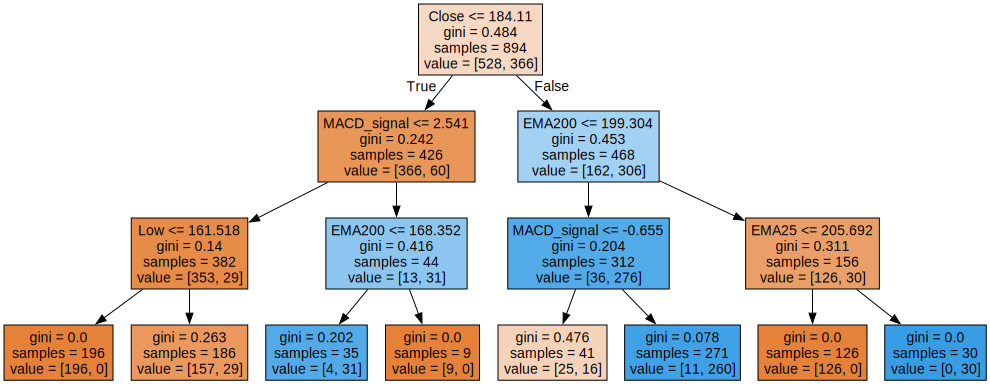

In [26]:
dot_data = tree.export_graphviz(
    clf, out_file=None, filled=True, feature_names=predictors_list)
graphviz.Source(dot_data)

In [27]:
def decision_tree_signal(row):
    if row['MACD_signal'] <= -0.415:
        if row['EMA25'] <= 205.692:
            if row['EMA200'] <= 198.888:
                if row['MACD_hist'] <= -1.137:
                    return 'Buy'
                else:
                    return 'Sell'
            else:
                return 'Sell'
        else:
            return 'Sell'
    else:
        if row['EMA25'] <= 181.608:
            return 'Sell'
        else:
            return 'Buy'


In [28]:
df['Signal'] = df.apply(decision_tree_signal, axis=1)

# ‡πÅ‡∏¢‡∏Å‡πÄ‡∏õ‡πá‡∏ô‡∏à‡∏∏‡∏î‡∏ã‡∏∑‡πâ‡∏≠-‡∏Ç‡∏≤‡∏¢
buy_signals = df[df['Signal'] == 'Buy']
sell_signals = df[df['Signal'] == 'Sell']


In [29]:
df

Date        Open        High         Low       Close  Target  \
199  2020-10-27  143.406301  144.664251  142.567667  144.244934       0   
200  2020-10-28  143.825592  145.083542  143.406275  145.083542       0   
201  2020-10-29  145.083557  146.341507  144.244924  146.341507       0   
202  2020-10-30  146.760829  146.760829  143.825612  144.664246       0   
203  2020-11-02  145.502895  145.502895  143.406311  143.406311       0   
...         ...         ...         ...         ...         ...     ...   
1312 2025-06-05  295.000000  295.000000  291.000000  293.000000       1   
1313 2025-06-06  293.000000  295.000000  289.000000  290.000000       1   
1314 2025-06-09  291.000000  292.000000  288.000000  289.000000       1   
1315 2025-06-10  288.000000  291.000000  287.000000  288.000000       1   
1316 2025-06-11  288.000000  293.000000  288.000000  292.000000       1   

           EMA25       EMA75      EMA200        RSI      MACD  MACD_signal  \
199   146.415929  150.715527  158.562357  42.095232 -1.349116    -1.390564   
200   146.313438  150.567317  158.428239  45.155685 -1.256022    -1.363656   
201   146.315597  150.456112  158.307973  49.470029 -1.068421    -1.304609   
202   146.188570  150.303694  158.172215  44.449319 -1.043064    -1.252300   
203   145.974550  150.122184  158.025290  41.081769 -1.111658    -1.224171   
...          ...         ...         ...        ...       ...          ...   
1312  290.896916  284.287442  268.712255  53.366154  1.110924     2.302123   
1313  290.827923  284.437773  268.924073  49.243306  0.880667     2.017832   
1314  290.687313  284.557831  269.123834  47.914500  0.610458     1.736357   
1315  290.480597  284.648415  269.311656  46.561414  0.312027     1.451491   
1316  290.597474  284.841878  269.537411  52.357058  0.393746     1.239942   

      MACD_hist Signal  
199    0.041448   Sell  
200    0.107633   Sell  
201    0.236187   Sell  
202    0.209236   Sell  
203    0.112514   Sell  
...         ...    ...  
1312  -1.191199    Buy  
1313  -1.137165    Buy  
1314  -1.125899    Buy  
1315  -1.139464    Buy  
1316  -0.846196    Buy  

[1118 rows x 14 columns]

In [30]:
# ‡∏™‡∏°‡∏°‡∏∏‡∏ï‡∏¥‡∏ß‡πà‡∏≤ df['Signal'] ‡∏°‡∏µ‡∏Ñ‡πà‡∏≤‡πÄ‡∏õ‡πá‡∏ô 'Buy', 'Sell', ‡∏´‡∏£‡∏∑‡∏≠ None/NaN
df['Target'] = df['Signal'].map({'Buy': 1, 'Sell': 0})


In [31]:
df.dropna(subset=['Target'], inplace=True)


In [33]:
df

Date        Open        High         Low       Close  Target  \
199  2020-10-27  143.406301  144.664251  142.567667  144.244934       0   
200  2020-10-28  143.825592  145.083542  143.406275  145.083542       0   
201  2020-10-29  145.083557  146.341507  144.244924  146.341507       0   
202  2020-10-30  146.760829  146.760829  143.825612  144.664246       0   
203  2020-11-02  145.502895  145.502895  143.406311  143.406311       0   
...         ...         ...         ...         ...         ...     ...   
1312 2025-06-05  295.000000  295.000000  291.000000  293.000000       1   
1313 2025-06-06  293.000000  295.000000  289.000000  290.000000       1   
1314 2025-06-09  291.000000  292.000000  288.000000  289.000000       1   
1315 2025-06-10  288.000000  291.000000  287.000000  288.000000       1   
1316 2025-06-11  288.000000  293.000000  288.000000  292.000000       1   

           EMA25       EMA75      EMA200        RSI      MACD  MACD_signal  \
199   146.415929  150.715527  158.562357  42.095232 -1.349116    -1.390564   
200   146.313438  150.567317  158.428239  45.155685 -1.256022    -1.363656   
201   146.315597  150.456112  158.307973  49.470029 -1.068421    -1.304609   
202   146.188570  150.303694  158.172215  44.449319 -1.043064    -1.252300   
203   145.974550  150.122184  158.025290  41.081769 -1.111658    -1.224171   
...          ...         ...         ...        ...       ...          ...   
1312  290.896916  284.287442  268.712255  53.366154  1.110924     2.302123   
1313  290.827923  284.437773  268.924073  49.243306  0.880667     2.017832   
1314  290.687313  284.557831  269.123834  47.914500  0.610458     1.736357   
1315  290.480597  284.648415  269.311656  46.561414  0.312027     1.451491   
1316  290.597474  284.841878  269.537411  52.357058  0.393746     1.239942   

      MACD_hist Signal  
199    0.041448   Sell  
200    0.107633   Sell  
201    0.236187   Sell  
202    0.209236   Sell  
203    0.112514   Sell  
...         ...    ...  
1312  -1.191199    Buy  
1313  -1.137165    Buy  
1314  -1.125899    Buy  
1315  -1.139464    Buy  
1316  -0.846196    Buy  

[1118 rows x 14 columns]

In [34]:
df['target_cls'] = df['Signal'].shift(-1)


üéØ 1. ‡∏à‡∏≤‡∏Å Signal ‡πÄ‡∏õ‡πá‡∏ô target_cls (Classification)
‡πÅ‡∏ô‡∏ß‡∏Ñ‡∏¥‡∏î:
‡πÉ‡∏ä‡πâ‡∏™‡∏±‡∏ç‡∏ç‡∏≤‡∏ì‡πÉ‡∏ô‡∏ß‡∏±‡∏ô‡∏ô‡∏µ‡πâ ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡πÉ‡∏´‡πâ‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢ ‚Äú‡∏û‡∏£‡∏∏‡πà‡∏á‡∏ô‡∏µ‡πâ‡∏Ñ‡∏ß‡∏£‡∏à‡∏∞‡∏ó‡∏≥‡∏≠‡∏∞‡πÑ‡∏£ (‡∏ã‡∏∑‡πâ‡∏≠‡∏´‡∏£‡∏∑‡∏≠‡∏Ç‡∏≤‡∏¢)‚Äù

python
Copy
Edit
df['target_cls'] = df['Signal'].shift(-1)
‡∏Ñ‡∏ß‡∏≤‡∏°‡∏´‡∏°‡∏≤‡∏¢:
1 = ‡∏û‡∏£‡∏∏‡πà‡∏á‡∏ô‡∏µ‡πâ‡∏Ñ‡∏ß‡∏£‡∏ã‡∏∑‡πâ‡∏≠ (‡∏£‡∏≤‡∏Ñ‡∏≤‡∏°‡∏µ‡πÅ‡∏ô‡∏ß‡πÇ‡∏ô‡πâ‡∏°‡∏Ç‡∏∂‡πâ‡∏ô)

-1 = ‡∏û‡∏£‡∏∏‡πà‡∏á‡∏ô‡∏µ‡πâ‡∏Ñ‡∏ß‡∏£‡∏Ç‡∏≤‡∏¢ (‡∏£‡∏≤‡∏Ñ‡∏≤‡∏°‡∏µ‡πÅ‡∏ô‡∏ß‡πÇ‡∏ô‡πâ‡∏°‡∏•‡∏á)

0 = ‡πÑ‡∏°‡πà‡∏ó‡∏≥‡∏≠‡∏∞‡πÑ‡∏£ (Hold)

In [35]:
df

Date        Open        High         Low       Close  Target  \
199  2020-10-27  143.406301  144.664251  142.567667  144.244934       0   
200  2020-10-28  143.825592  145.083542  143.406275  145.083542       0   
201  2020-10-29  145.083557  146.341507  144.244924  146.341507       0   
202  2020-10-30  146.760829  146.760829  143.825612  144.664246       0   
203  2020-11-02  145.502895  145.502895  143.406311  143.406311       0   
...         ...         ...         ...         ...         ...     ...   
1312 2025-06-05  295.000000  295.000000  291.000000  293.000000       1   
1313 2025-06-06  293.000000  295.000000  289.000000  290.000000       1   
1314 2025-06-09  291.000000  292.000000  288.000000  289.000000       1   
1315 2025-06-10  288.000000  291.000000  287.000000  288.000000       1   
1316 2025-06-11  288.000000  293.000000  288.000000  292.000000       1   

           EMA25       EMA75      EMA200        RSI      MACD  MACD_signal  \
199   146.415929  150.715527  158.562357  42.095232 -1.349116    -1.390564   
200   146.313438  150.567317  158.428239  45.155685 -1.256022    -1.363656   
201   146.315597  150.456112  158.307973  49.470029 -1.068421    -1.304609   
202   146.188570  150.303694  158.172215  44.449319 -1.043064    -1.252300   
203   145.974550  150.122184  158.025290  41.081769 -1.111658    -1.224171   
...          ...         ...         ...        ...       ...          ...   
1312  290.896916  284.287442  268.712255  53.366154  1.110924     2.302123   
1313  290.827923  284.437773  268.924073  49.243306  0.880667     2.017832   
1314  290.687313  284.557831  269.123834  47.914500  0.610458     1.736357   
1315  290.480597  284.648415  269.311656  46.561414  0.312027     1.451491   
1316  290.597474  284.841878  269.537411  52.357058  0.393746     1.239942   

      MACD_hist Signal target_cls  
199    0.041448   Sell       Sell  
200    0.107633   Sell       Sell  
201    0.236187   Sell       Sell  
202    0.209236   Sell       Sell  
203    0.112514   Sell       Sell  
...         ...    ...        ...  
1312  -1.191199    Buy        Buy  
1313  -1.137165    Buy        Buy  
1314  -1.125899    Buy        Buy  
1315  -1.139464    Buy        Buy  
1316  -0.846196    Buy       None  

[1118 rows x 15 columns]

In [36]:
df.dropna(subset=['target_cls'], inplace=True)


üìä 2. ‡∏à‡∏≤‡∏Å Signal ‡πÄ‡∏õ‡πá‡∏ô target_rgs (Regression)
‡πÅ‡∏ô‡∏ß‡∏Ñ‡∏¥‡∏î:
‡πÉ‡∏ä‡πâ‡∏™‡∏±‡∏ç‡∏ç‡∏≤‡∏ì‡∏ß‡∏±‡∏ô‡∏ô‡∏µ‡πâ ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡πÉ‡∏´‡πâ‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢ ‚Äú‡∏û‡∏£‡∏∏‡πà‡∏á‡∏ô‡∏µ‡πâ‡∏ú‡∏•‡∏ï‡∏≠‡∏ö‡πÅ‡∏ó‡∏ô‡∏à‡∏∞‡πÄ‡∏õ‡πá‡∏ô‡πÄ‡∏ó‡πà‡∏≤‡πÑ‡∏´‡∏£‡πà (continuous return)‚Äù

python
Copy
Edit
df['target_rgs'] = df['Return'].shift(-1)
‡πÇ‡∏î‡∏¢‡πÑ‡∏°‡πà‡∏à‡∏≥‡πÄ‡∏õ‡πá‡∏ô‡∏ï‡πâ‡∏≠‡∏á‡πÉ‡∏ä‡πâ Signal ‡πÇ‡∏î‡∏¢‡∏ï‡∏£‡∏á‡πÄ‡∏õ‡πá‡∏ô target ‡πÅ‡∏ï‡πà‡πÉ‡∏ä‡πâ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏™‡∏£‡πâ‡∏≤‡∏á‡∏™‡∏±‡∏ç‡∏ç‡∏≤‡∏ì ‡πÅ‡∏•‡πâ‡∏ß‡∏ô‡∏≥‡∏ú‡∏•‡∏ï‡∏≠‡∏ö‡πÅ‡∏ó‡∏ô‡∏ó‡∏µ‡πà‡πÅ‡∏ó‡πâ‡∏à‡∏£‡∏¥‡∏á‡∏°‡∏≤‡πÄ‡∏õ‡πá‡∏ô‡πÄ‡∏õ‡πâ‡∏≤‡∏´‡∏°‡∏≤‡∏¢‡πÉ‡∏´‡πâ‡πÇ‡∏°‡πÄ‡∏î‡∏•‡πÄ‡∏£‡∏µ‡∏¢‡∏ô‡∏£‡∏π‡πâ

‚ú® ‡∏´‡∏≤‡∏Å‡∏Ñ‡∏∏‡∏ì‡∏ï‡πâ‡∏≠‡∏á‡∏Å‡∏≤‡∏£‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡∏à‡∏≤‡∏Å Signal ‚Üí target_cls ‡πÇ‡∏î‡∏¢‡πÉ‡∏ä‡πâ‡∏Å‡∏≤‡∏£‡∏Å‡∏£‡∏∞‡∏ó‡∏≥‡πÅ‡∏ó‡∏ô:
Signal	‡∏Ñ‡∏ß‡∏≤‡∏°‡∏´‡∏°‡∏≤‡∏¢	target_cls (‡πÅ‡∏õ‡∏•‡∏á‡πÄ‡∏õ‡πá‡∏ô Binary)
1	Buy	1
-1	Sell	0
0	Hold/No action	‡∏≠‡∏≤‡∏à‡πÄ‡∏•‡∏∑‡∏≠‡∏Å 0 ‡∏´‡∏£‡∏∑‡∏≠ drop ‡∏ó‡∏¥‡πâ‡∏á

python
Copy
Edit
df['target_cls'] = df['Signal'].replace({1: 1, -1: 0, 0: np.nan})
df.dropna(subset=['target_cls'], inplace=True)
df['target_cls'] = df['target_cls'].astype(int)


In [38]:
df['Return'] = df['Close'].pct_change()


In [40]:
df['target_rgs'] = df['Return'].shift(-1)              # ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö regression
df['target_cls'] = (df['Return'].shift(-1) > 0).astype(int)  # ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö classification



In [41]:
df

Date        Open        High         Low       Close  Target  \
199  2020-10-27  143.406301  144.664251  142.567667  144.244934       0   
200  2020-10-28  143.825592  145.083542  143.406275  145.083542       0   
201  2020-10-29  145.083557  146.341507  144.244924  146.341507       0   
202  2020-10-30  146.760829  146.760829  143.825612  144.664246       0   
203  2020-11-02  145.502895  145.502895  143.406311  143.406311       0   
...         ...         ...         ...         ...         ...     ...   
1311 2025-06-04  285.000000  294.000000  283.000000  293.000000       1   
1312 2025-06-05  295.000000  295.000000  291.000000  293.000000       1   
1313 2025-06-06  293.000000  295.000000  289.000000  290.000000       1   
1314 2025-06-09  291.000000  292.000000  288.000000  289.000000       1   
1315 2025-06-10  288.000000  291.000000  287.000000  288.000000       1   

           EMA25       EMA75      EMA200        RSI      MACD  MACD_signal  \
199   146.415929  150.715527  158.562357  42.095232 -1.349116    -1.390564   
200   146.313438  150.567317  158.428239  45.155685 -1.256022    -1.363656   
201   146.315597  150.456112  158.307973  49.470029 -1.068421    -1.304609   
202   146.188570  150.303694  158.172215  44.449319 -1.043064    -1.252300   
203   145.974550  150.122184  158.025290  41.081769 -1.111658    -1.224171   
...          ...         ...         ...        ...       ...          ...   
1311  290.721659  284.051968  268.468157  53.366154  1.083203     2.599923   
1312  290.896916  284.287442  268.712255  53.366154  1.110924     2.302123   
1313  290.827923  284.437773  268.924073  49.243306  0.880667     2.017832   
1314  290.687313  284.557831  269.123834  47.914500  0.610458     1.736357   
1315  290.480597  284.648415  269.311656  46.561414  0.312027     1.451491   

      MACD_hist Signal  target_cls    Return  target_rgs  
199    0.041448   Sell           1       NaN    0.005814  
200    0.107633   Sell           1  0.005814    0.008671  
201    0.236187   Sell           0  0.008671   -0.011461  
202    0.209236   Sell           0 -0.011461   -0.008696  
203    0.112514   Sell           0 -0.008696   -0.002924  
...         ...    ...         ...       ...         ...  
1311  -1.516720    Buy           0  0.024476    0.000000  
1312  -1.191199    Buy           0  0.000000   -0.010239  
1313  -1.137165    Buy           0 -0.010239   -0.003448  
1314  -1.125899    Buy           0 -0.003448   -0.003460  
1315  -1.139464    Buy           0 -0.003460         NaN  

[1117 rows x 17 columns]

In [42]:
df.dropna(subset=['target_rgs', 'target_cls'], inplace=True)


In [48]:
df

Date        Open        High         Low       Close  Target  \
199  2020-10-27  143.406301  144.664251  142.567667  144.244934       0   
200  2020-10-28  143.825592  145.083542  143.406275  145.083542       0   
201  2020-10-29  145.083557  146.341507  144.244924  146.341507       0   
202  2020-10-30  146.760829  146.760829  143.825612  144.664246       0   
203  2020-11-02  145.502895  145.502895  143.406311  143.406311       0   
...         ...         ...         ...         ...         ...     ...   
1310 2025-05-30  287.000000  291.000000  284.000000  286.000000       1   
1311 2025-06-04  285.000000  294.000000  283.000000  293.000000       1   
1312 2025-06-05  295.000000  295.000000  291.000000  293.000000       1   
1313 2025-06-06  293.000000  295.000000  289.000000  290.000000       1   
1314 2025-06-09  291.000000  292.000000  288.000000  289.000000       1   

           EMA25       EMA75      EMA200        RSI      MACD  MACD_signal  \
199   146.415929  150.715527  158.562357  42.095232 -1.349116    -1.390564   
200   146.313438  150.567317  158.428239  45.155685 -1.256022    -1.363656   
201   146.315597  150.456112  158.307973  49.470029 -1.068421    -1.304609   
202   146.188570  150.303694  158.172215  44.449319 -1.043064    -1.252300   
203   145.974550  150.122184  158.025290  41.081769 -1.111658    -1.224171   
...          ...         ...         ...        ...       ...          ...   
1310  290.531798  283.810129  268.221606  43.919726  1.032064     2.979103   
1311  290.721659  284.051968  268.468157  53.366154  1.083203     2.599923   
1312  290.896916  284.287442  268.712255  53.366154  1.110924     2.302123   
1313  290.827923  284.437773  268.924073  49.243306  0.880667     2.017832   
1314  290.687313  284.557831  269.123834  47.914500  0.610458     1.736357   

      MACD_hist Signal  target_cls    Return  target_rgs  
199    0.041448   Sell           1       NaN    0.005814  
200    0.107633   Sell           1  0.005814    0.008671  
201    0.236187   Sell           0  0.008671   -0.011461  
202    0.209236   Sell           0 -0.011461   -0.008696  
203    0.112514   Sell           0 -0.008696   -0.002924  
...         ...    ...         ...       ...         ...  
1310  -1.947039    Buy           1 -0.003484    0.024476  
1311  -1.516720    Buy           0  0.024476    0.000000  
1312  -1.191199    Buy           0  0.000000   -0.010239  
1313  -1.137165    Buy           0 -0.010239   -0.003448  
1314  -1.125899    Buy           0 -0.003448   -0.003460  

[1116 rows x 17 columns]

In [49]:
y_cls = df.target_cls
y_cls.tail()



1310    1
1311    0
1312    0
1313    0
1314    0
Name: target_cls, dtype: int32

In [50]:
y_rgs = df.target_rgs
y_rgs.tail()

1310    0.024476
1311    0.000000
1312   -0.010239
1313   -0.003448
1314   -0.003460
Name: target_rgs, dtype: float64

In [51]:
from sklearn.model_selection import train_test_split
y=y_cls
X_cls_train, X_cls_test, y_cls_train, y_cls_test = train_test_split(X, y, test_size=0.3, random_state=432, stratify=y)

print (X_cls_train.shape, y_cls_train.shape)
print (X_cls_test.shape, y_cls_test.shape)

(781, 11) (781,)
(335, 11) (335,)


# Splitting the data into training and testing data sets
The last step to finish with the preparation of the data sets is to split them into train and test data sets. This is necessary to fit the model with a set of data, usually 70% or 80% and the remainder, to test the goodness of the model. If we do not do so, we would run the risk of over-fitting the model. We want to test the model with unknown data, once the model has been fitted in order to evaluate the model accuracy.

We‚Äôre going to create the train data set with the 70% of the data from predictor and target variables data sets and the remainder 30% to test the model.

For classification decision trees, we‚Äôre going to use the traintestsplit function from sklearn modelselection library to split the dataset. Since the output is categorical, it is important that the training and test datasets are proportional traintest_split function has as input the predictor and target datasets and some input parameters:

test_size: the size of the test data set, in this case, 30% of the data for the tests and, therefore, 70% for the training.
random_state: Since the sampling is random, this parameter allows us to reproduce the same randomness in each execution.
stratify: To ensure that the training and test sample data are proportional, we set the parameter to yes. This means that, for example, if there are more days with positive than negative return, the training and test samples will keep the same proportion.

# Here we have:

Train predictor variables dataset: X_cls_train
Train target variables dataset: y_cls_train
Test predictor variables dataset: X_cls_test
Test target variables dataset: y_cls_test
For regression decision trees we simply split the data at the specified rate, since the output is continuous, we don‚Äôt worry about the proportionality of the output in training and test datasets.

In [52]:
train_length = int(len(df)*0.70)
X_rgs_train = X[:train_length]
X_rgs_test = X[train_length:]
y_rgs_train = y_rgs[:train_length]
y_rgs_test = y_rgs[train_length:]

print (X_rgs_train.shape, y_rgs_train.shape)
print (X_rgs_test.shape, y_rgs_test.shape)

(781, 11) (781,)
(335, 11) (335,)


In [53]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=6)
clf

DecisionTreeClassifier(max_depth=3, min_samples_leaf=6)

# Now we are going to train the model with the training datasets, we fit the model and the algorithm would already be fully trained.

In [54]:
clf = clf.fit(X_cls_train, y_cls_train)
clf

DecisionTreeClassifier(max_depth=3, min_samples_leaf=6)

# Now we need to make forecasts with the model on unknown data, for this we will use 30% of the data that we had left reserved for testing and, finally, evaluate the performance of the model. But first, let‚Äôs take a graphical look at the classification decision tree that the ML algorithm has automatically created for us.

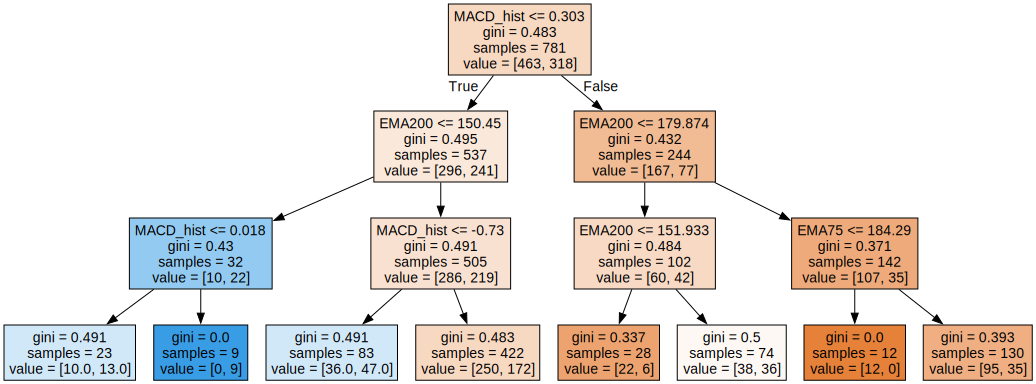

In [55]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None,filled=True,feature_names=predictors_list)
graphviz.Source(dot_data)

# Make forecast
Now let‚Äôs make predictions with data sets reserved for testing, this is the part that will let us know if the algorithm is reliable with unknown data in training.

In [56]:
y_cls_pred = clf.predict(X_cls_test)


# Performance analysis
Finally, we can only evaluate the performance of the algorithm on unknown data by comparing it with the result obtained in the training process. To do this we will use the classification_report function of the sklearn.metrics library.

The report shows some parameters that will help us to evaluate the goodness of the algorithm:

Precision: Indicate the quality of our predictions.
Recall: Indicate the quality of our predictions.
F1-score: Shows the harmonic mean of precision and recall.
Support: Used as weights to compute the average values of precision, recall and F-1.

In [57]:
from sklearn.metrics import classification_report
report = classification_report(y_cls_test, y_cls_pred)
print(report)

              precision    recall  f1-score   support

           0       0.58      0.80      0.68       199
           1       0.37      0.17      0.23       136

    accuracy                           0.54       335
   macro avg       0.47      0.48      0.45       335
weighted avg       0.50      0.54      0.49       335



# Decision Trees for Regression
Now let‚Äôs create the regression decision tree using the DecisionTreeRegressor function from the sklearn.tree library.

Although the DecisionTreeRegressor function has many parameters that I invite you to know and experiment with (help(DecisionTreeRegressor)), here we will see the basics to create the regression decision tree.

# criterion ‡∏Ñ‡∏∑‡∏≠ ‡∏ï‡∏±‡∏ß‡∏ä‡∏µ‡πâ‡∏ß‡∏±‡∏î‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ú‡∏¥‡∏î‡∏û‡∏•‡∏≤‡∏î‡∏Ç‡∏≠‡∏á‡πÇ‡∏°‡πÄ‡∏î‡∏• ‡πÄ‡∏ä‡πà‡∏ô MSE ‡∏´‡∏£‡∏∑‡∏≠ MAE ‡πÉ‡∏ä‡πâ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏õ‡∏£‡∏∞‡πÄ‡∏°‡∏¥‡∏ô‡πÅ‡∏•‡∏∞‡∏õ‡∏£‡∏±‡∏ö‡∏õ‡∏£‡∏∏‡∏á‡∏Ñ‡∏ß‡∏≤‡∏°‡πÅ‡∏°‡πà‡∏ô‡∏¢‡∏≥‡∏Ç‡∏≠‡∏á‡∏ï‡πâ‡∏ô‡πÑ‡∏°‡πâ

# max_depth ‡∏Ñ‡∏∑‡∏≠ ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏•‡∏∂‡∏Å‡∏™‡∏π‡∏á‡∏™‡∏∏‡∏î‡∏Ç‡∏≠‡∏á‡∏ï‡πâ‡∏ô‡πÑ‡∏°‡πâ ‡∏ñ‡πâ‡∏≤‡πÑ‡∏°‡πà‡∏Å‡∏≥‡∏´‡∏ô‡∏î‡∏à‡∏∞‡∏•‡∏∂‡∏Å‡πÑ‡∏î‡πâ‡πÑ‡∏°‡πà‡∏à‡∏≥‡∏Å‡∏±‡∏î

# min_samples_leaf ‡∏Ñ‡∏∑‡∏≠ ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏Ç‡∏±‡πâ‡∏ô‡∏ï‡πà‡∏≥‡∏ó‡∏µ‡πà‡∏ï‡πâ‡∏≠‡∏á‡∏°‡∏µ‡πÉ‡∏ô‡πÅ‡∏ï‡πà‡∏•‡∏∞‡πÉ‡∏ö‡πÑ‡∏°‡πâ ‡∏ä‡πà‡∏ß‡∏¢‡∏•‡∏î‡∏Å‡∏≤‡∏£‡∏ã‡∏±‡∏ö‡∏ã‡πâ‡∏≠‡∏ô‡πÅ‡∏•‡∏∞‡∏õ‡πâ‡∏≠‡∏á‡∏Å‡∏±‡∏ô‡∏Å‡∏≤‡∏£ overfitting

In [58]:
# Regression tree model
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(min_samples_leaf = 200)

In [59]:
dtr.fit(X_rgs_train, y_rgs_train)

DecisionTreeRegressor(min_samples_leaf=200)

# ‡∏Ç‡∏±‡πâ‡∏ô‡∏ï‡∏≠‡∏ô
# ‡πÅ‡∏ö‡πà‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÄ‡∏õ‡πá‡∏ô Train (70%) ‡πÅ‡∏•‡∏∞ Test (30%)

# ‡∏™‡∏£‡πâ‡∏≤‡∏á‡πÇ‡∏°‡πÄ‡∏î‡∏• Decision Tree Classifier

‡∏ß‡∏≤‡∏î‡πÅ‡∏ú‡∏ô‡∏†‡∏π‡∏°‡∏¥ Decision Tree ‡πÅ‡∏ö‡∏ö‡∏Å‡∏£‡∏≤‡∏ü‡∏¥‡∏Å

‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• Test ‡πÅ‡∏•‡∏∞‡∏õ‡∏£‡∏∞‡πÄ‡∏°‡∏¥‡∏ô‡∏ú‡∏• (accuracy, classification report)



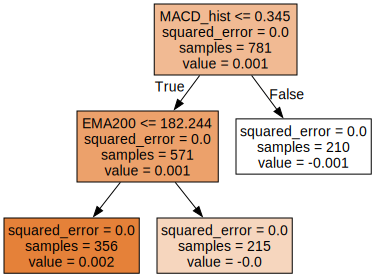

In [60]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(dtr,
                  out_file=None,
                  filled=True,
                  feature_names=predictors_list)
graphviz.Source(dot_data)

# ‡πÄ‡∏™‡πâ‡∏ô‡∏ó‡∏≤‡∏á‡∏Å‡∏≤‡∏£‡∏ï‡∏±‡∏î‡∏™‡∏¥‡∏ô‡πÉ‡∏à‡∏Ç‡∏≠‡∏á‡∏ï‡πâ‡∏ô‡πÑ‡∏°‡πâ‡∏ó‡∏µ‡πà‡πÉ‡∏ä‡πâ EMA200 ‡πÄ‡∏õ‡πá‡∏ô‡πÄ‡∏Å‡∏ì‡∏ë‡πå‡πÉ‡∏ô‡∏Å‡∏≤‡∏£‡πÅ‡∏ö‡πà‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÅ‡∏™‡∏î‡∏á‡∏ß‡πà‡∏≤

‡∏´‡∏≤‡∏Å EMA200 ‡∏ï‡πà‡∏≥‡∏Å‡∏ß‡πà‡∏≤‡∏´‡∏£‡∏∑‡∏≠‡πÄ‡∏ó‡πà‡∏≤‡∏Å‡∏±‡∏ö 182.244 ‡∏Ñ‡∏≤‡∏î‡∏ß‡πà‡∏≤‡∏à‡∏∞‡πÑ‡∏î‡πâ‡∏ú‡∏•‡∏ï‡∏≠‡∏ö‡πÅ‡∏ó‡∏ô‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢‡∏õ‡∏£‡∏∞‡∏°‡∏≤‡∏ì +0.1%

# ‡∏´‡∏≤‡∏Å EMA200 ‡∏™‡∏π‡∏á‡∏Å‡∏ß‡πà‡∏≤ 182.244 ‡∏à‡∏∞‡∏°‡∏µ 2 ‡∏Å‡∏•‡∏∏‡πà‡∏°‡∏¢‡πà‡∏≠‡∏¢‡∏Ñ‡∏∑‡∏≠ ‡∏Å‡∏•‡∏∏‡πà‡∏°‡∏ó‡∏µ‡πà‡∏Ñ‡∏≤‡∏î‡∏ß‡πà‡∏≤‡∏à‡∏∞‡πÑ‡∏î‡πâ‡∏ú‡∏•‡∏ï‡∏≠‡∏ö‡πÅ‡∏ó‡∏ô‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢‡∏õ‡∏£‡∏∞‡∏°‡∏≤‡∏ì -0.1% ‡πÅ‡∏•‡∏∞‡∏Å‡∏•‡∏∏‡πà‡∏°‡∏ó‡∏µ‡πà‡∏Ñ‡∏≤‡∏î‡∏ß‡πà‡∏≤‡∏à‡∏∞‡πÑ‡∏î‡πâ‡∏ú‡∏•‡∏ï‡∏≠‡∏ö‡πÅ‡∏ó‡∏ô‡∏õ‡∏£‡∏∞‡∏°‡∏≤‡∏ì +0.2%

# the predictor variable used to split the data set.
the value of MSE.
the number of data points available at that node

# ‡∏Ñ‡∏≥‡∏≠‡∏ò‡∏¥‡∏ö‡∏≤‡∏¢‡∏ï‡πâ‡∏ô‡πÑ‡∏°‡πâ‡∏ï‡∏±‡∏î‡∏™‡∏¥‡∏ô‡πÉ‡∏à (Decision Tree) ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏Å‡∏≤‡∏£‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡∏Ñ‡πà‡∏≤‡∏ú‡∏•‡∏ï‡∏≠‡∏ö‡πÅ‡∏ó‡∏ô‡∏´‡∏∏‡πâ‡∏ô
‡∏ï‡πâ‡∏ô‡πÑ‡∏°‡πâ‡∏ï‡∏±‡∏î‡∏™‡∏¥‡∏ô‡πÉ‡∏à‡∏ô‡∏µ‡πâ‡πÉ‡∏ä‡πâ‡∏ï‡∏±‡∏ß‡∏ä‡∏µ‡πâ‡∏ß‡∏±‡∏î‡∏ó‡∏≤‡∏á‡πÄ‡∏ó‡∏Ñ‡∏ô‡∏¥‡∏Ñ ‡πÄ‡∏ä‡πà‡∏ô MACD Histogram (MACD_hist) ‡πÅ‡∏•‡∏∞‡∏Ñ‡πà‡∏≤‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢‡πÄ‡∏Ñ‡∏•‡∏∑‡πà‡∏≠‡∏ô‡∏ó‡∏µ‡πà EMA200 (EMA200) ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡πÅ‡∏ö‡πà‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏≠‡∏≠‡∏Å‡πÄ‡∏õ‡πá‡∏ô‡∏Å‡∏•‡∏∏‡πà‡∏°‡∏¢‡πà‡∏≠‡∏¢ ‡πÜ ‡∏ó‡∏µ‡πà‡∏°‡∏µ‡∏•‡∏±‡∏Å‡∏©‡∏ì‡∏∞‡∏Ñ‡∏•‡πâ‡∏≤‡∏¢‡∏Å‡∏±‡∏ô ‡πÅ‡∏•‡∏∞‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡∏Ñ‡πà‡∏≤‡∏ú‡∏•‡∏ï‡∏≠‡∏ö‡πÅ‡∏ó‡∏ô (return) ‡∏Ç‡∏≠‡∏á‡∏´‡∏∏‡πâ‡∏ô‡πÉ‡∏ô‡∏ß‡∏±‡∏ô‡∏ñ‡∏±‡∏î‡πÑ‡∏õ

‡πÇ‡∏Ñ‡∏£‡∏á‡∏™‡∏£‡πâ‡∏≤‡∏á‡∏Ç‡∏≠‡∏á‡∏ï‡πâ‡∏ô‡πÑ‡∏°‡πâ
Node ‡πÅ‡∏£‡∏Å:
‡πÄ‡∏ä‡πá‡∏Ñ‡πÄ‡∏á‡∏∑‡πà‡∏≠‡∏ô‡πÑ‡∏Ç‡∏ß‡πà‡∏≤ MACD_hist <= 0.345

‡∏´‡∏≤‡∏Å ‡πÉ‡∏ä‡πà (True) ‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏à‡∏∞‡∏ñ‡∏π‡∏Å‡πÅ‡∏ö‡πà‡∏á‡πÑ‡∏õ‡∏ó‡∏µ‡πà Node ‡∏ñ‡∏±‡∏î‡πÑ‡∏õ‡∏ó‡∏≤‡∏á‡∏ã‡πâ‡∏≤‡∏¢

‡∏´‡∏≤‡∏Å ‡πÑ‡∏°‡πà‡πÉ‡∏ä‡πà (False) ‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏à‡∏∞‡∏ñ‡∏π‡∏Å‡πÅ‡∏ö‡πà‡∏á‡πÑ‡∏õ‡∏ó‡∏≤‡∏á‡∏Ç‡∏ß‡∏≤

Node ‡∏ã‡πâ‡∏≤‡∏¢:
‡πÄ‡∏ä‡πá‡∏Ñ‡πÄ‡∏á‡∏∑‡πà‡∏≠‡∏ô‡πÑ‡∏Ç‡∏ß‡πà‡∏≤ EMA200 <= 182.244

‡∏ñ‡πâ‡∏≤‡πÉ‡∏ä‡πà ‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏Å‡∏•‡∏∏‡πà‡∏°‡∏ô‡∏µ‡πâ‡∏°‡∏µ‡∏Ñ‡πà‡∏≤‡∏ú‡∏•‡∏ï‡∏≠‡∏ö‡πÅ‡∏ó‡∏ô‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢‡∏õ‡∏£‡∏∞‡∏°‡∏≤‡∏ì 0.001

‡∏ñ‡πâ‡∏≤‡πÑ‡∏°‡πà‡πÉ‡∏ä‡πà ‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏Å‡∏•‡∏∏‡πà‡∏°‡∏ô‡∏µ‡πâ‡∏°‡∏µ‡∏Ñ‡πà‡∏≤‡∏ú‡∏•‡∏ï‡∏≠‡∏ö‡πÅ‡∏ó‡∏ô‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢‡∏õ‡∏£‡∏∞‡∏°‡∏≤‡∏ì -0.001

Node ‡∏Ç‡∏ß‡∏≤:
‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏Å‡∏•‡∏∏‡πà‡∏°‡∏ô‡∏µ‡πâ‡∏°‡∏µ‡∏Ñ‡πà‡∏≤‡∏ú‡∏•‡∏ï‡∏≠‡∏ö‡πÅ‡∏ó‡∏ô‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢‡∏õ‡∏£‡∏∞‡∏°‡∏≤‡∏ì 0.002

‡∏Ñ‡∏ß‡∏≤‡∏°‡∏´‡∏°‡∏≤‡∏¢‡∏Ç‡∏≠‡∏á‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏Ñ‡πà‡∏≤‡πÉ‡∏ô Node
samples: ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏ï‡∏±‡∏ß‡∏≠‡∏¢‡πà‡∏≤‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ó‡∏µ‡πà‡∏≠‡∏¢‡∏π‡πà‡πÉ‡∏ô node ‡∏ô‡∏±‡πâ‡∏ô ‡πÜ

value: ‡∏Ñ‡πà‡∏≤‡∏ú‡∏•‡∏ï‡∏≠‡∏ö‡πÅ‡∏ó‡∏ô‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢‡∏Ç‡∏≠‡∏á‡∏ï‡∏±‡∏ß‡∏≠‡∏¢‡πà‡∏≤‡∏á‡πÉ‡∏ô node ‡∏ô‡∏±‡πâ‡∏ô (‡∏Ñ‡∏∑‡∏≠‡∏Ñ‡πà‡∏≤‡∏ó‡∏µ‡πà‡∏ï‡πâ‡∏ô‡πÑ‡∏°‡πâ‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡πÑ‡∏î‡πâ)

squared_error: ‡∏Ñ‡πà‡∏≤‡∏Ñ‡∏ß‡∏≤‡∏°‡∏Ñ‡∏•‡∏≤‡∏î‡πÄ‡∏Ñ‡∏•‡∏∑‡πà‡∏≠‡∏ô‡∏£‡∏ß‡∏°‡∏Ç‡∏≠‡∏á‡∏ï‡∏±‡∏ß‡∏≠‡∏¢‡πà‡∏≤‡∏á‡πÉ‡∏ô node ‡∏ô‡∏±‡πâ‡∏ô (‡∏ñ‡πâ‡∏≤‡∏Ñ‡πà‡∏≤‡∏ô‡∏µ‡πâ‡∏ï‡πà‡∏≥ ‡∏´‡∏°‡∏≤‡∏¢‡∏ñ‡∏∂‡∏á‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏û‡∏¢‡∏≤‡∏Å‡∏£‡∏ì‡πå‡πÑ‡∏î‡πâ‡πÅ‡∏°‡πà‡∏ô‡∏¢‡∏≥‡πÉ‡∏ô node ‡∏ô‡∏±‡πâ‡∏ô)